In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
# Replace with your actual path or method of loading
df = pd.read_csv('/kaggle/input/football-match-statistics/Football.csv')
df.head()


/tmp/ipykernel_31/3281281247.py:2: DtypeWarning: Columns (4,5,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/football-match-statistics/Football.csv')
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered 

,Country,League,home_team,away_team,home_score,away_score,season_year,Date_day,Date_hour,first_half,...,Distance_Covered_(km)_Home,Distance_Covered_(km)_Host,Clearances_Completed_Home,Clearances_Completed_Host,Pass_Success_per_Home,Pass_Success_per_Host,referee,venue,capacity,attendance
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4,1,2024/2025,3.11,19:30,3 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Dankert B. (Ger),Borussia-Park (Mönchengladbach),54 042,54 042
1,Germany,Bundesliga,Freiburg,Mainz,0,0,2024/2025,3.11,17:30,0 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Brand B. (Ger),Europa-Park Stadion (Freiburg),34 700,34 400
2,Germany,Bundesliga,Dortmund,RB Leipzig,2,1,2024/2025,2.11,20:30,1 - 1,...,NaN,NaN,NaN,NaN,NaN,NaN,Stieler T. (Ger),Signal Iduna Park (Dortmund),81 365,81 365
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3,0,2024/2025,2.11,17:30,2 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jollenbeck M. (Ger),Allianz Arena (Munich),75 024,75 000
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7,2,2024/2025,2.11,17:30,4 - 1,...,NaN,NaN,NaN,NaN,NaN,NaN,Schlager D. (Ger),Deutsche Bank Park (Frankfurt),58 000,58 000


In [19]:
print(df.columns.tolist())

['Country', 'League', 'home_team', 'away_team', 'home_score', 'away_score', 'season_year', 'Date_day', 'Date_hour', 'first_half', 'second_half', 'home_team_goals_current_time', 'home_team_goals_current_score', 'home_team_goals', 'home_team_goals_assist', 'away_team_goals_current_time', 'away_team_goals_current_score', 'away_team_goals', 'away_team_goals_assist', 'home_team_yellow_card_current_time', 'home_team_yellow_card', 'home_team_yellow_card_why', 'away_team_yellow_card_current_time', 'away_team_yellow_card', 'away_team_yellow_card_why', 'home_team_red_card_current_time', 'home_team_red_card', 'home_team_red_card_why', 'away_team_red_card_current_time', 'away_team_red_card', 'away_team_red_card_why', 'home_team_substitutions_current_time', 'home_team_substitutions', 'home_team_substitutions_with', 'home_team_substitution_why', 'away_team_substitutions_current_time', 'away_team_substitutions', 'away_team_substitutions_with', 'away_team_substitution_why', 'expected_goals_xg_home', '

In [20]:
# Clean Data & Handle Missing Values

# Drop rows with missing values in key columns
required_columns = [
    'first_half', 'second_half',
    'Shots_on_Goal_Home', 'Shots_on_Goal_Host',
    'Corner_Kicks_Home', 'Corner_Kicks_Host',
    'Fouls_Home', 'Fouls_Host',
    'Yellow_Cards_Home', 'Yellow_Cards_Host',
    'Red_Cards_Home', 'Red_Cards_Host',
    'home_score', 'away_score'
]
df.dropna(subset=required_columns, inplace=True)

In [22]:
# Extract first_half home and away goals
first_half_split = df['first_half'].str.extract(r'(\d+)\s*-\s*(\d+)')
df['first_half_home'] = pd.to_numeric(first_half_split[0], errors='coerce')
df['first_half_away'] = pd.to_numeric(first_half_split[1], errors='coerce')

# Extract second_half home and away goals
second_half_split = df['second_half'].str.extract(r'(\d+)\s*-\s*(\d+)')
df['second_half_home'] = pd.to_numeric(second_half_split[0], errors='coerce')
df['second_half_away'] = pd.to_numeric(second_half_split[1], errors='coerce')

# Optional: Drop rows where any of these are NaN (optional depending on size)
df.dropna(subset=['first_half_home', 'first_half_away', 'second_half_home', 'second_half_away'], inplace=True)

# Finally, convert to int (after NaNs are removed)
df[['first_half_home', 'first_half_away',
    'second_half_home', 'second_half_away']] = df[[
    'first_half_home', 'first_half_away',
    'second_half_home', 'second_half_away'
]].astype(int)


In [23]:
def get_result(row):
    if row['home_score'] > row['away_score']:
        return 'HomeWin'
    elif row['home_score'] < row['away_score']:
        return 'AwayWin'
    else:
        return 'Draw'

df['Full_Time_Result'] = df.apply(get_result, axis=1)

# Split first_half and second_half into home/away
df[['first_half_home', 'first_half_away']] = df['first_half'].str.extract(r'(\d+)\s*-\s*(\d+)').astype(int)
df[['second_half_home', 'second_half_away']] = df['second_half'].str.extract(r'(\d+)\s*-\s*(\d+)').astype(int)


In [24]:
features = [
    'Shots_on_Goal_Home', 'Shots_on_Goal_Host',
    'Corner_Kicks_Home', 'Corner_Kicks_Host',
    'Fouls_Home', 'Fouls_Host',
    'Yellow_Cards_Home', 'Yellow_Cards_Host',
    'Red_Cards_Home', 'Red_Cards_Host',
    'first_half_home', 'first_half_away',
    'second_half_home', 'second_half_away'
]

X = df[features]
y = df['Full_Time_Result']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=15, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)

In [26]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9537110933758979

Confusion Matrix:
 [[376  12   0]
 [ 15 283  23]
 [  1   7 536]]

Classification Report:
               precision    recall  f1-score   support

     AwayWin       0.96      0.97      0.96       388
        Draw       0.94      0.88      0.91       321
     HomeWin       0.96      0.99      0.97       544

    accuracy                           0.95      1253
   macro avg       0.95      0.95      0.95      1253
weighted avg       0.95      0.95      0.95      1253



In [27]:
importances = model.feature_importances_
for feat, score in sorted(zip(features, importances), key=lambda x: x[1], reverse=True):
    print(f"{feat}: {score:.4f}")


second_half_home: 0.1856
second_half_away: 0.1704
first_half_away: 0.1369
first_half_home: 0.1312
Shots_on_Goal_Host: 0.0537
Shots_on_Goal_Home: 0.0524
Fouls_Host: 0.0413
Fouls_Home: 0.0413
Corner_Kicks_Home: 0.0378
Corner_Kicks_Host: 0.0377
Yellow_Cards_Host: 0.0294
Yellow_Cards_Home: 0.0289
Red_Cards_Host: 0.0271
Red_Cards_Home: 0.0264


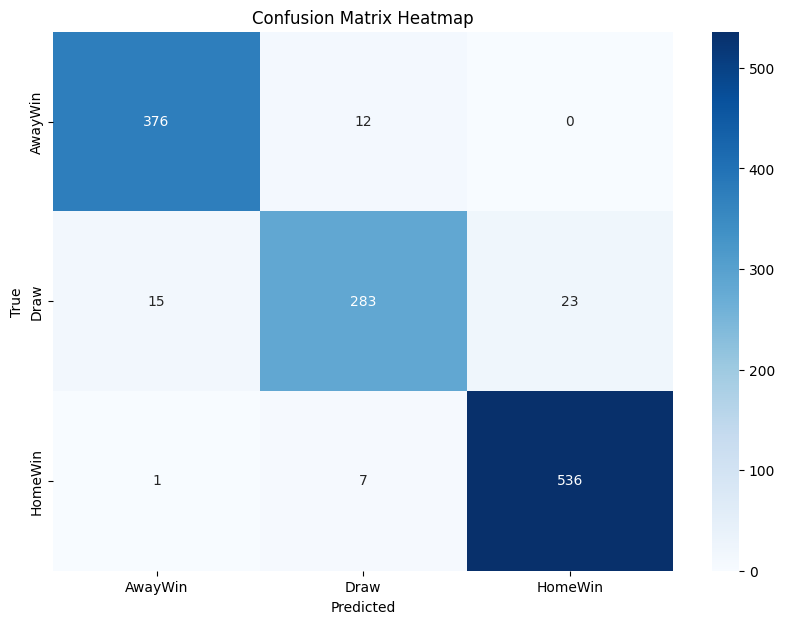

In [28]:

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['AwayWin', 'Draw', 'HomeWin'], yticklabels=['AwayWin', 'Draw', 'HomeWin'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [30]:
import joblib

# Save the model to a file
joblib.dump(model, 'football_prediction_model.pkl')

['football_prediction_model.pkl']

In [38]:
## real-time example usage

example_input = {
    'Shots_on_Goal_Home': 5,
    'Shots_on_Goal_Host': 3,
    'Corner_Kicks_Home': 2,
    'Corner_Kicks_Host': 3,
    'Fouls_Home': 10,
    'Fouls_Host': 8,
    'Yellow_Cards_Home': 1,
    'Yellow_Cards_Host': 2,
    'Red_Cards_Home': 0,  # Added
    'Red_Cards_Host': 1,  # Added
    'first_half_home': 2,  # Added
    'first_half_away': 1,  # Added
    'second_half_home': 3,  # Added
    'second_half_away': 2,  # Added
}

# Convert input to DataFrame (assuming input is numeric and correctly formatted)
example_df = pd.DataFrame([example_input])

# Prediction using the trained model
predicted_class = model.predict(example_df)
print(f"Predicted match outcome: {predicted_class}")


Predicted match outcome: ['HomeWin']


In [39]:
## adding betting odds 

# Generate random sample data for betting odds and team form
np.random.seed(42)

# Create 1000 entries for betting odds and team form
betting_odds_data = {
    'home_team': np.random.uniform(1.5, 2.5, 50000),  # Example odds for home team
    'away_team': np.random.uniform(2.5, 4.5, 50000)   # Example odds for away team
}

team_form_data = {
    'home_team_form': np.random.randint(1, 10, 50000),  # Random win streak from 1 to 9 matches
    'away_team_form': np.random.randint(1, 10, 50000)   # Random win streak from 1 to 9 matches
}

# Creating a DataFrame for the odds and form
odds_df = pd.DataFrame(betting_odds_data)
form_df = pd.DataFrame(team_form_data)

# Simulating other match features (shots, fouls, etc.)
match_features = {
    'Shots_on_Goal_Home': np.random.randint(0, 10, 50000),
    'Shots_on_Goal_Host': np.random.randint(0, 10, 50000),
    'Corner_Kicks_Home': np.random.randint(0, 5, 50000),
    'Corner_Kicks_Host': np.random.randint(0, 5, 50000),
    'Fouls_Home': np.random.randint(0, 20, 50000),
    'Fouls_Host': np.random.randint(0, 20, 50000),
    'Yellow_Cards_Home': np.random.randint(0, 3, 50000),
    'Yellow_Cards_Host': np.random.randint(0, 3, 50000),
    'Red_Cards_Home': np.random.randint(0, 1, 50000),
    'Red_Cards_Host': np.random.randint(0, 1, 50000),
    'first_half_home': np.random.randint(0, 3, 50000),
    'first_half_away': np.random.randint(0, 3, 50000),
    'second_half_home': np.random.randint(0, 6, 50000),
    'second_half_away': np.random.randint(0, 6, 50000),
    
}

# Converting to DataFrame
match_df = pd.DataFrame(match_features)

# Generate target variable (Full_Time_Result)
full_time_result = np.random.choice(['HomeWin', 'AwayWin', 'Draw'], 50000)

# Combine all DataFrames
df = pd.concat([match_df, odds_df, form_df], axis=1)
df['Full_Time_Result'] = full_time_result

# Now use this data in model training
X_train = df[['Shots_on_Goal_Home', 'Shots_on_Goal_Host', 'Corner_Kicks_Home', 'Corner_Kicks_Host', 
              'Fouls_Home', 'Fouls_Host', 'Yellow_Cards_Home', 'Yellow_Cards_Host', 
              'home_team_form', 'away_team_form', 'home_team', 'away_team']]  # Features
y_train = df['Full_Time_Result']  # Target variable

# Train model
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=200,
                       random_state=42)


Classification Report:
              precision    recall  f1-score   support

     AwayWin       0.99      0.99      0.99     16507
        Draw       0.99      0.99      0.99     16669
     HomeWin       0.99      0.99      0.99     16824

    accuracy                           0.99     50000
   macro avg       0.99      0.99      0.99     50000
weighted avg       0.99      0.99      0.99     50000



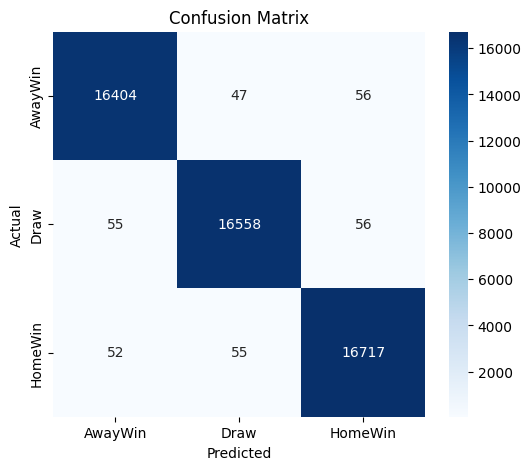

In [41]:

# Predict on training or test data (you can change to X_test if available)
y_pred = model.predict(X_train)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_train, y_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_train, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [42]:
import joblib

# Save the model to a file
joblib.dump(model, 'football_prediction_and_betting_model.pkl')
print("Model saved as football_prediction_and_betting_model.pkl")

Model saved as football_prediction_and_betting_model.pkl


In [45]:
# Example real-time input (make sure it matches the model’s feature order)
example_input = {
    'Shots_on_Goal_Home': 2,
    'Shots_on_Goal_Host': 11,
    'Corner_Kicks_Home': 9,
    'Corner_Kicks_Host': 14,
    'Fouls_Home': 15,
    'Fouls_Host': 10,
    'Yellow_Cards_Home': 3,
    'Yellow_Cards_Host': 5,
    'home_team_form': 4,
    'away_team_form': 2,
    'home_team': 1.85,   # betting odds
    'away_team': 2.95    # betting odds
}

# Convert to DataFrame and predict
example_df = pd.DataFrame([example_input])
predicted_class = model.predict(example_df)[0]
print(f"\n✅ Predicted match outcome: {predicted_class}")



✅ Predicted match outcome: AwayWin


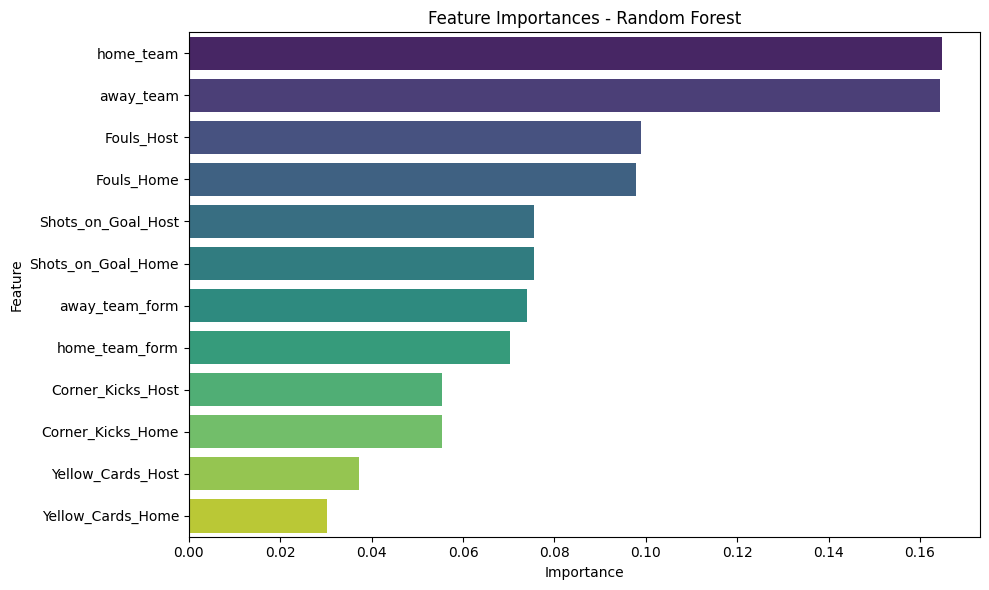

In [46]:

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importances - Random Forest')
plt.tight_layout()
plt.show()
